
# Project: TMDb movie

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This analysis is focused on the the factors that affect the succees of a movie, the dataset used is collected from The Movie Database (TMDb). The specific fields/ columns considered for this analysis include; popularity,budget, revenue,runtime, genres,production companies, release_date,vote_count, vote_average,release_year

<a id='obj'></a>
## Objectives
Exploratory analysis will cover the following;
- What kinds of properties are associated with movies that have high revenue
- Influence of genres on the revenue, popularity and rating of movies
- Influence of production companies on the revenue, popularity and rating of movies
- Total revenue per month
- Total revenue per year

### Importing Modules

In [1]:
import pandas as pd
import seaborn as sns                  #for visualization
import matplotlib.pyplot as plt        #for visualization

### Load data

In [2]:
movie=pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
## Data Wrangling

1. Take a peak at the data
2. Check for format of each column
3. Check for Null values
4. Check for duplicates
5. Creating new columns such as (profit,profit margin, month, season)


In [3]:
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
movie.shape

(10866, 21)

In [7]:
movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Take a peak at the data

1. There are 10866, rows of data
2. Numerical columns include ('popularity', 'budget', 'revenue', 'runtime','vote_count', 'vote_average','budget_adj', 'revenue_adj')
3. Categorical columns include ('original_title', 'cast', 'homepage','director', 'tagline', 'keywords', 'overview','genres', 'production_companies', )
4. However for the purpose of this analysis, we shall only consider


1.budget_adj - The adjusted budget in which the movie was made to account for unbiasedness in times.

2.genre - The genre of the movie, Action, Comedy ,Thriller etc.

3.popularity - A numeric quantity specifying the movie popularity.

4.production_companies - The production house of the movie.

5.production_countries - The country in which it was produced.

6.release_date - The date on which it was released.

7.revenue_adj - The adjusted revenue in which the movie was made to account for unbiasedness in times.

8.runtime - The running time of the movie in minutes.

9.vote_average - average ratings the movie recieved.

10.vote_count - the count of votes recieved.

### formatting

In [8]:
movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [9]:
# release date should be in datetime format
movie['release_date'] = pd.to_datetime(movie['release_date'])

### Check for nulls

In [10]:

movie[pd.isnull(movie)].sum()

id                      0.0
imdb_id                   0
popularity              0.0
budget                  0.0
revenue                 0.0
original_title            0
cast                      0
homepage                  0
director                  0
tagline                   0
keywords                  0
overview                  0
runtime                 0.0
genres                    0
production_companies      0
vote_count              0.0
vote_average            0.0
release_year            0.0
budget_adj              0.0
revenue_adj             0.0
dtype: object

### Duplicates

In [11]:
movie[movie.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [12]:
movie[movie['imdb_id']=='tt0411951']    #identify the duplicated column

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,2010,30000000.0,967000.0


In [13]:
movie.drop_duplicates(subset=None, keep='first', inplace=True)    #drop duplicate

In [14]:
movie[movie.duplicated()]    #confirm removal of duplicates

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


### Data manipulation

new columns include

1.month - the month in which the movie was released

2.season - autumn, summer, winter, spring

3.profit-  the difference in revenue and budget

4.profit margin- the percentage profit/ loss

5.splitting each entry of genres and production companies into new columns

In [15]:
#selected columns
movie = movie[['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'runtime', 'genres', 'production_companies',
               'release_date', 'vote_count', 'vote_average', 'release_year']]

In [16]:
#month
movie['month'] = movie['release_date'].dt.month_name()

In [17]:
#for season of the year
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer',
           'Summer', 'Summer', 'Autumn', 'Autumn', 'Autumn', 'Winter']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December']
#map each months to its corresponding season
month_to_season = dict(zip(months, seasons))         
movie['season'] = movie['release_date'].dt.month_name().map(month_to_season)

In [18]:
#profit
movie['profit']=movie['revenue_adj']-movie['budget_adj']

In [19]:
#profit margin
movie['profit_margin'] = (movie['profit']/movie['revenue_adj'])*100

In [20]:
#Splitting genres and companies and explode to rows
movie = movie.assign(genres=movie['genres'].str.split('|')).explode('genres')             #genres
movie=movie.assign(production_companies=movie['production_companies'].str.split('|')).explode('production_companies') #companies


In [21]:
movie.columns

Index(['id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'month', 'season', 'profit',
       'profit_margin'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we shall be exploring the questions posed in the objectives
- Influence of genres on the revenue, popularity, rating of movies and runtime
- Influence of production companies on the revenue, popularity, rating of movies and runtime
- Total revenue per month, season, and year
- What kinds of properties are associated with movies that have high revenue



#### Function

In [22]:
def myGrpPlot(df, xVar, yVar, stat='mean', index=None, figsize=[24, 6], kind='bar'):
    
    '''
    This function produces visualizations for line and barcharts, using groupby to select unique elements in the column
    if the unique values are greater than 20 and the kind of visual is bar, the first 5 will be selected in ascending form
    
    '''
    count=df[xVar].nunique()
    #barplot
    if kind=='bar':   
        if count > 20 :
            count=5
            df.groupby([xVar])[yVar].agg(stat).reindex(index=index).sort_values(ascending=False)[:count].plot(kind=f'{kind}',
                                                                                                           edgecolor='black',
                                                                                                           width=0.8,
                                                                                                           figsize=figsize,
                                                                                                           rot=0);
            
            #tidy up labels
            xVar=xVar.replace("_", " ")  #replace _ with space
            yVar=yVar.replace("_", " ")      #replace _ with space
            #Add title and format it
            plt.title(f'{stat} of {yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{stat} {yVar}'.title(), fontsize=10, weight='bold')
            
        elif count <=20 :
            df.groupby([xVar])[yVar].agg(stat).reindex(index=index).plot(kind=f'{kind}', edgecolor='black', width=0.8,
                                                                      figsize=figsize,
                                                                      rot=0);
            #tidy up labels
            xVar=xVar.replace("_", " ")  #replace _ with space
            yVar=yVar.replace("_", " ")      #replace _ with space
            #Add title and format it
            plt.title(f'{stat} of {yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{stat} {yVar}'.title(), fontsize=10, weight='bold')
    
    #lineplot       
    elif kind=='line':
            df.groupby([xVar])[yVar].agg(stat).reindex(index=index).plot(kind=f'{kind}', linewidth=2, markersize=12,
                                                                         figsize=figsize);
            #tidy up labels
            xVar=xVar.replace("_", " ")  #replace _ with space
            yVar=yVar.replace("_", " ")      #replace _ with space
            #Add title and format it
            plt.title(f'{stat} of {yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{stat} {yVar}'.title(), fontsize=10, weight='bold')
            
    #scatterplot
    else:
        
            df.plot(xVar, yVar, kind=f'{kind}', linewidth=2, marker='s',figsize=figsize, edgecolor='blue');
            #tidy up labels
            #Add title and format it
            plt.title(f'{yVar} by {xVar}'.title(), fontsize =14, weight ='bold')
            #Add x label and format it
            plt.xlabel(xVar.title(), fontsize=10, weight='bold')
            #Add y label and format it 
            plt.ylabel(f'{yVar}'.title(), fontsize=10, weight='bold')
            
        


###  Revenue and Count per month, season, and year

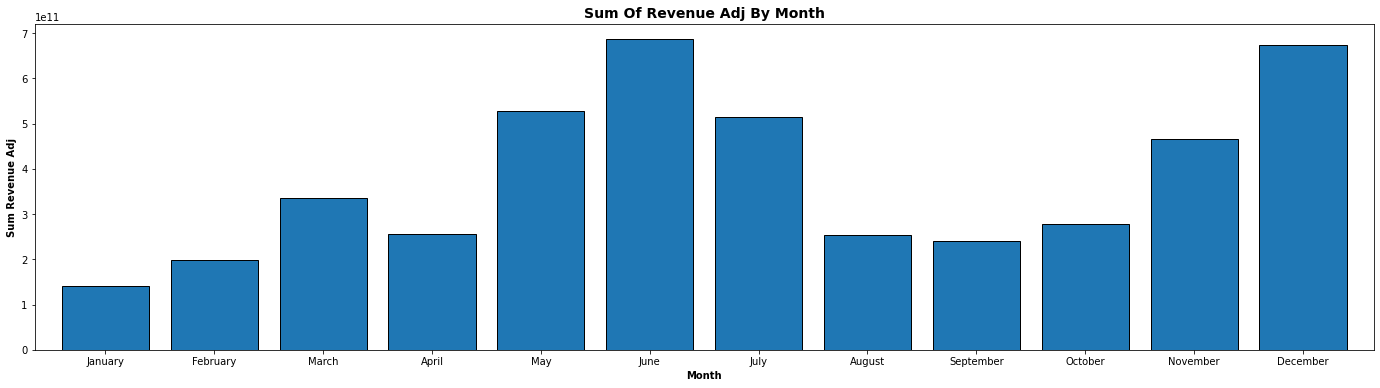

In [23]:
#Revenue per month
myGrpPlot(movie, 'month', 'revenue_adj', stat='sum', kind='bar', index=months)

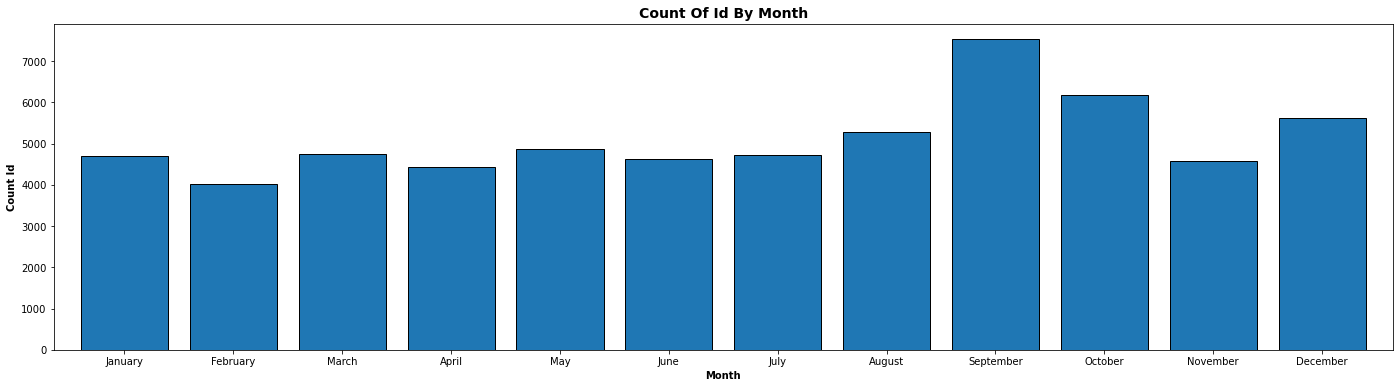

In [24]:
#number of movies per month
myGrpPlot(movie, 'month', 'id', stat='count', index=months)

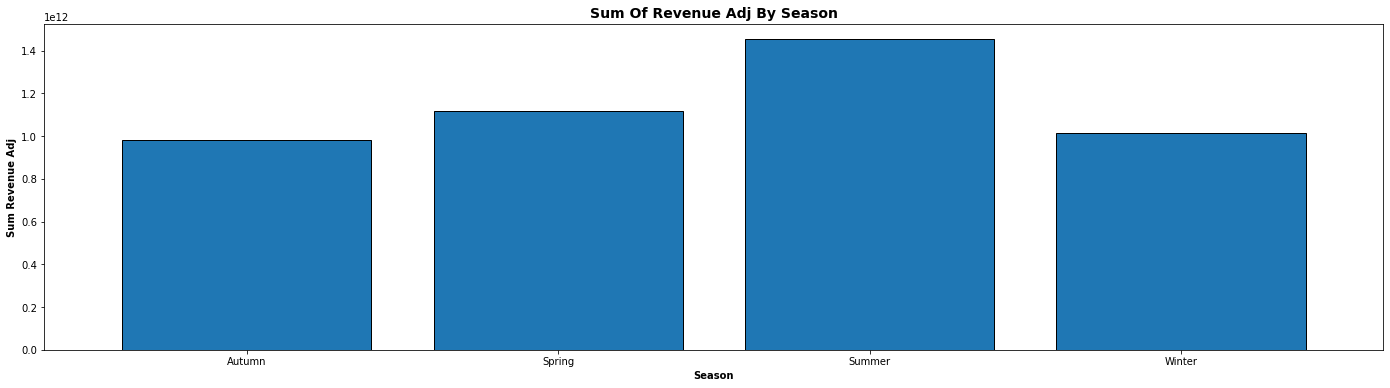

In [25]:
#Revenue per season
myGrpPlot(movie, 'season', 'revenue_adj', stat='sum', index=None)

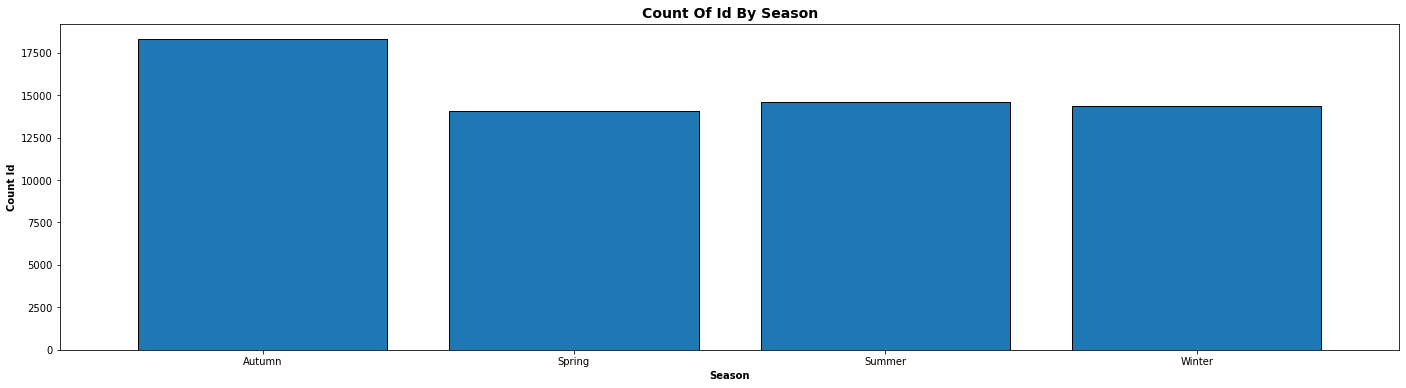

In [26]:
#Number of movies per season
myGrpPlot(movie, 'season', 'id', stat='count')

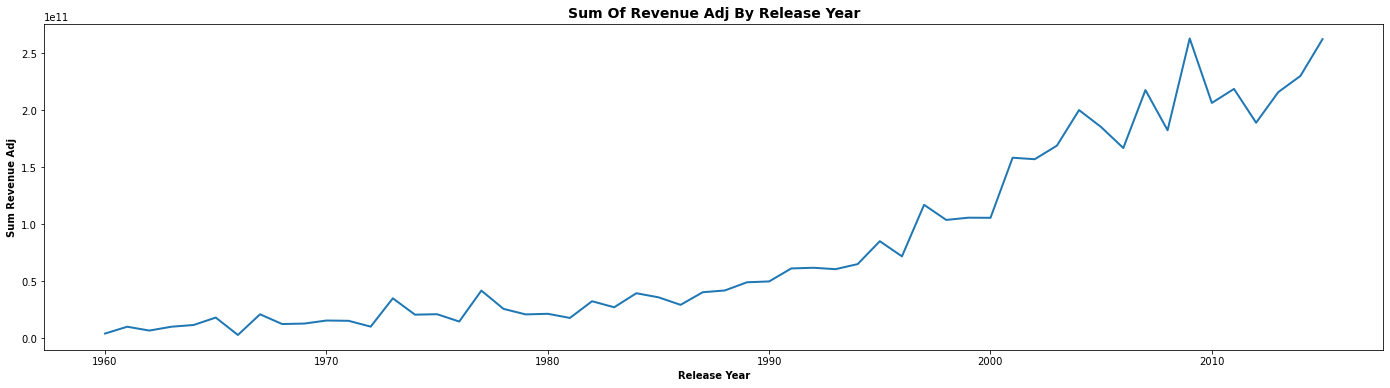

In [27]:
#Revenue per year
myGrpPlot(movie, 'release_year', 'revenue_adj', stat='sum',kind='line')

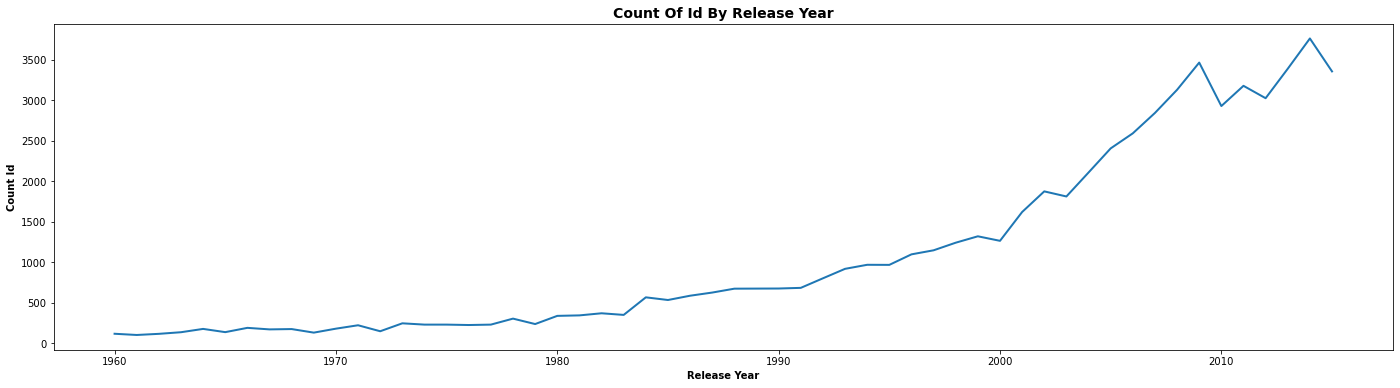

In [28]:
#Number of movies per year
myGrpPlot(movie, 'release_year', 'id', stat='count',kind='line')

#### inference
- Although more movies are produced in june, september generates the most revenue
- Although more movies are produced in autumn, summer generates the most revenue
- there is direct relationship between year and revenue ( as year increases, revenue increases)

### Influence of genres on the revenue, popularity and rating of movies

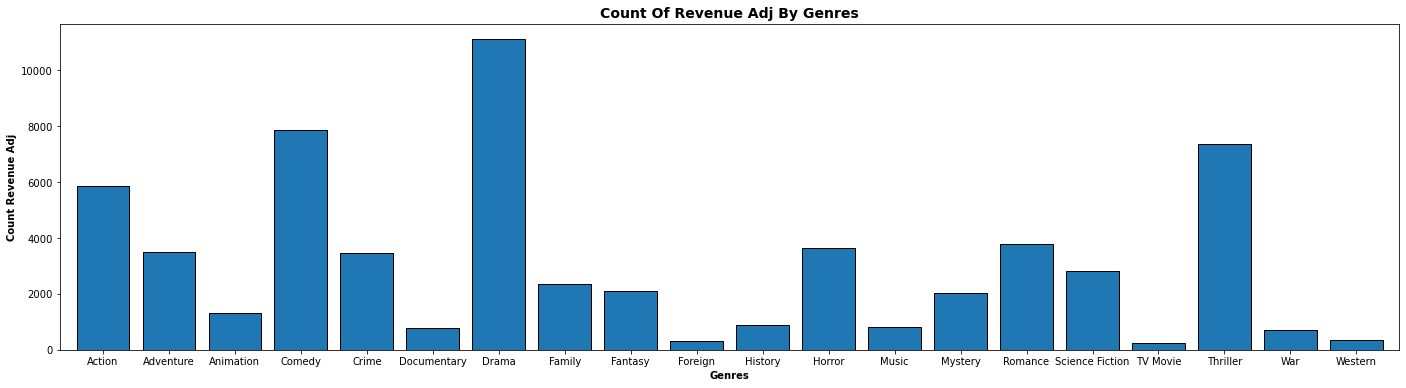

In [29]:
#numbers of movies per genre
myGrpPlot(movie, 'genres', 'revenue_adj', stat='count', kind='bar')

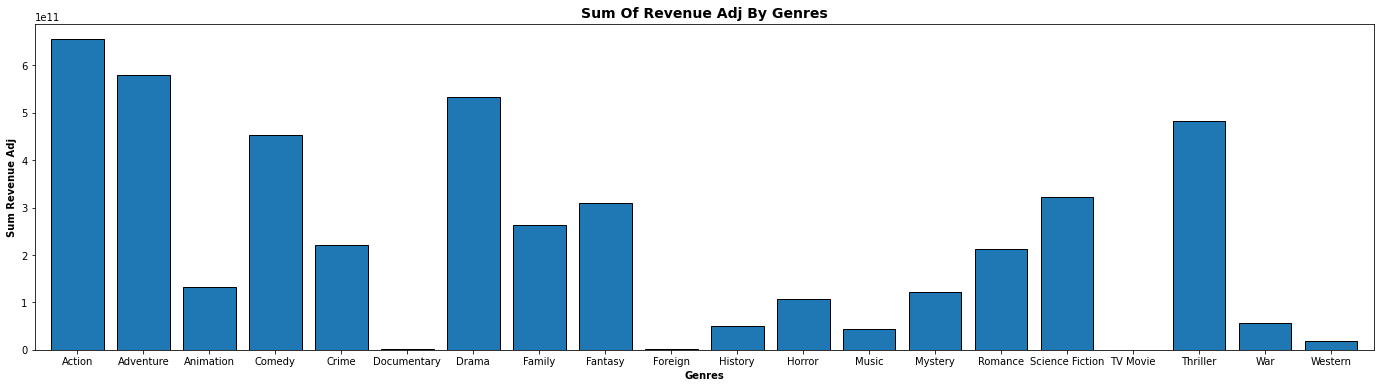

In [30]:
#revenue per genre
myGrpPlot(movie, 'genres', 'revenue_adj', stat='sum', kind='bar')

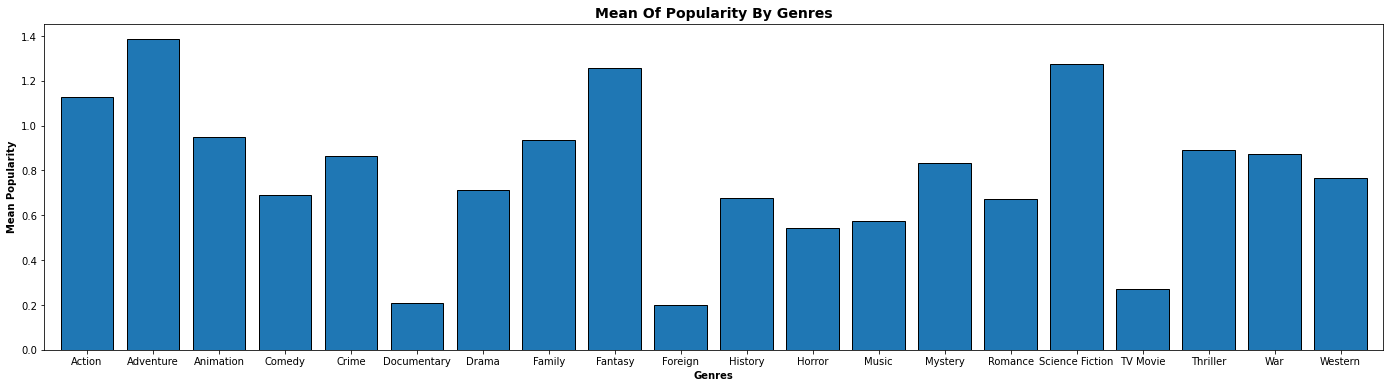

In [31]:
#popularity per genre
myGrpPlot(movie, 'genres', 'popularity', stat='mean', kind='bar')

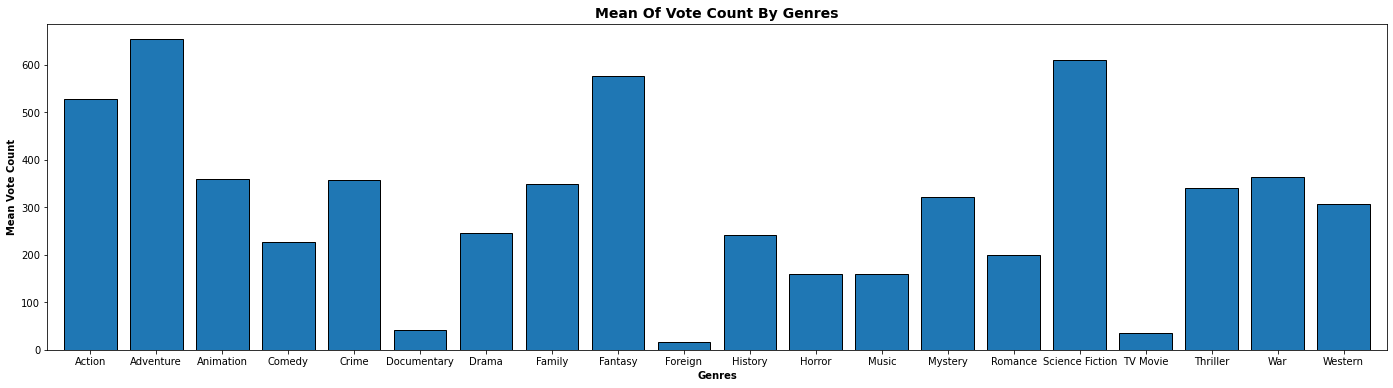

In [32]:
#average ratings per genre
myGrpPlot(movie, 'genres', 'vote_count', stat='mean', kind='bar')

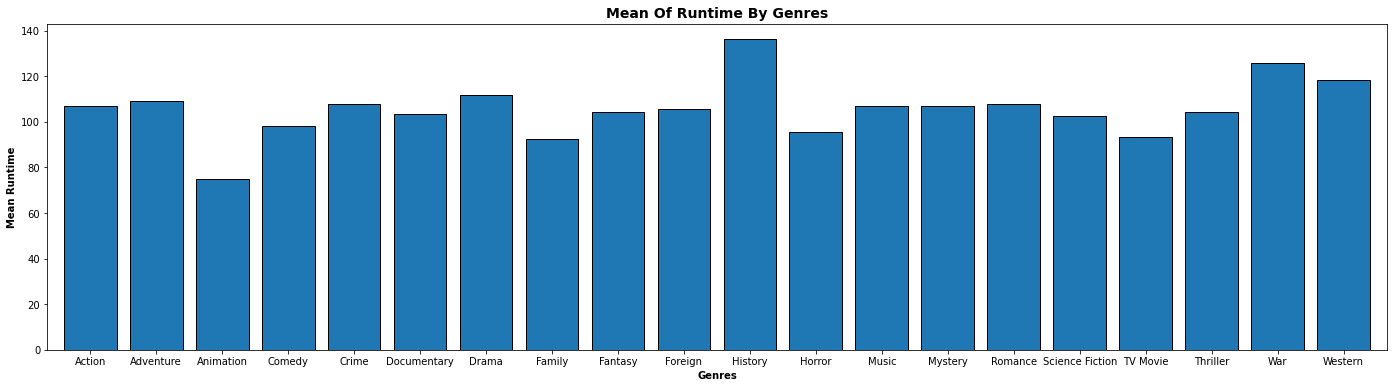

In [33]:
#average runtime per genre
myGrpPlot(movie, 'genres', 'runtime', stat='mean', kind='bar')

#### inference
- Drama has the highest number of movie produced, but Action and Adventure generates more revenue
- Adventures and Actions are the most popular movies 
- Averagely, the general rating is between 5 and 6
- History have the higest runtime per movie

### Influence of production_companies on the revenue, popularity and rating of movies

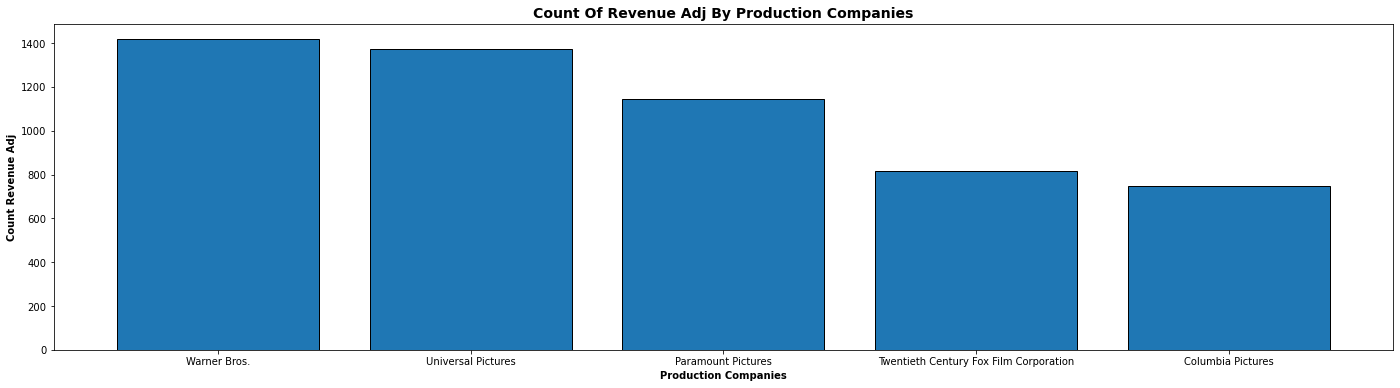

In [34]:
#numbers of movies per production_companies
myGrpPlot(movie, 'production_companies', 'revenue_adj', stat='count', kind='bar')

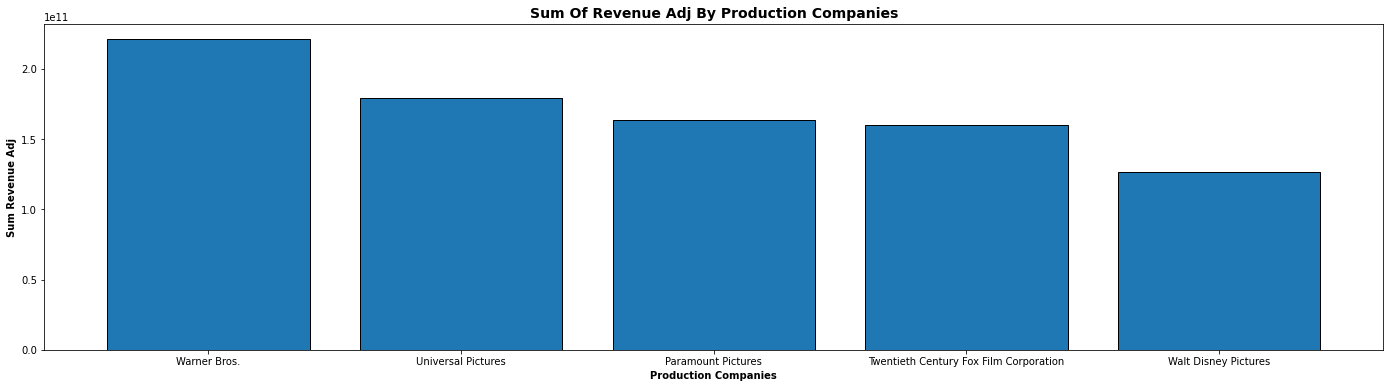

In [35]:
#Revenue per production_companies
myGrpPlot(movie, 'production_companies', 'revenue_adj', stat='sum', kind='bar')

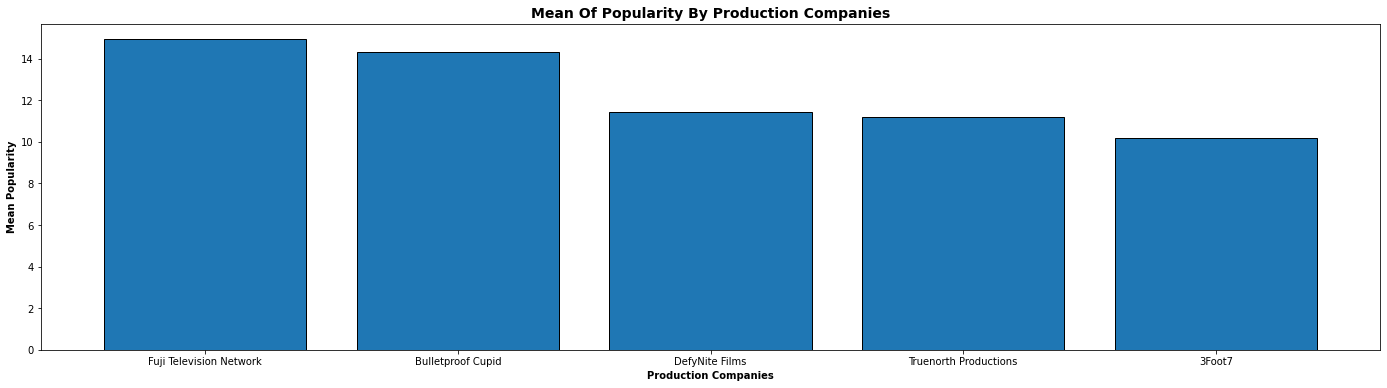

In [36]:
#average popularity per production_companies
myGrpPlot(movie, 'production_companies', 'popularity', stat='mean', kind='bar')

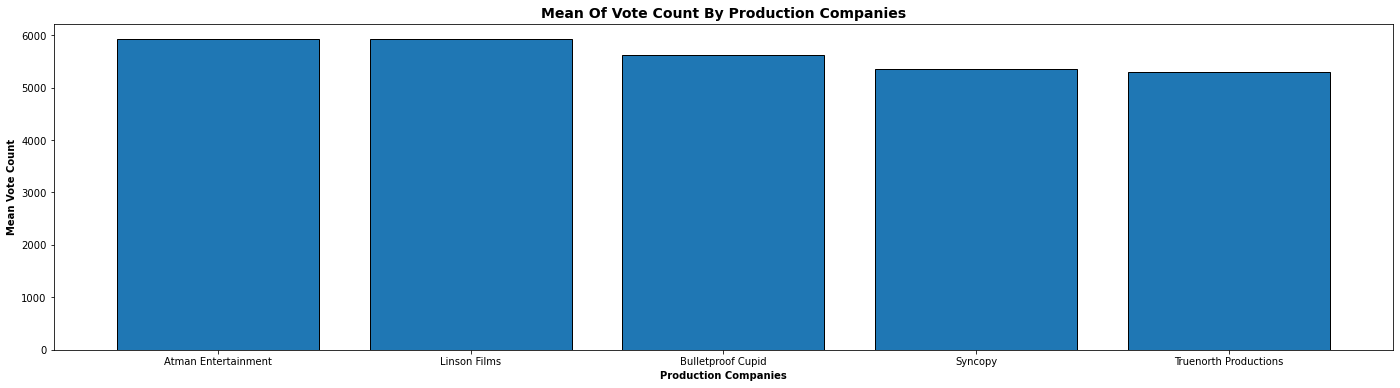

In [37]:
#average rating per production_companies
myGrpPlot(movie, 'production_companies', 'vote_count', stat='mean', kind='bar')

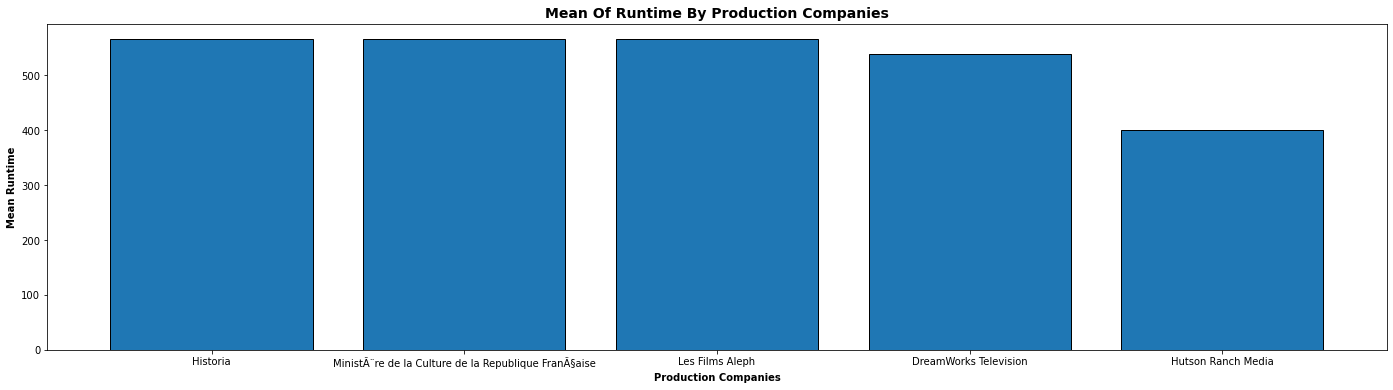

In [38]:
#average runtime per production_companies
myGrpPlot(movie, 'production_companies', 'runtime', stat='mean', kind='bar')

#### inference
- Werner Bro has the highest number of movie produced and generates the most revenue
- Averagely Fuji Television Network, Defnyte films, Bulletproof Cupid, produce the most popular movies 
- Averagely Atman Entertainment, Linson films, Bulletproof Cupid, have the highest rating
- Averagely most production company have an average runtime of 120 to 140

### What kinds of properties are associated with movies that have high revenue

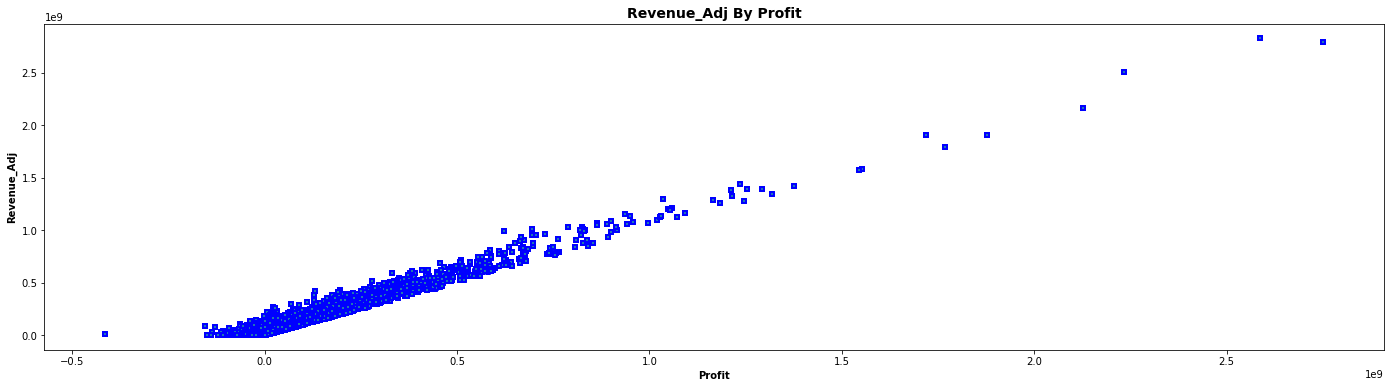

In [40]:
myGrpPlot(movie, 'profit', 'revenue_adj', kind='scatter')

### inference

- Revenue is directly proportional to the Profit


<a id='conclusions'></a>
## Conclusions
- Drama has the highest number of movie produced, but Action and Adventure generates more revenue
- Adventures and Actions are the most popular movies 
- Averagely, the general rating is between 5 and 6
- History have the higest runtime per movie
- Werner Bro has the highest number of movie produced and generates the most revenue
- Averagely dentsu produce the most popular movies 
- Averagely syncopy have the highest rating
- Averagely most production company have an average runtime of 120 to 140
- Revenue is directly proportional to the Profit


### Limitations

- Data is not up to date, which can imply uncertainty
- lack of proper definitions of each columns